In [1]:
#Importing Modules
import pandas as pd
import numpy as np
from scipy.stats import chi2
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
#plt.style.use("ggplot")
#from google.colab import drive
from pandas.testing import assert_frame_equal
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from tabulate import tabulate
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('base_limpa/base_unificada_limpa.csv')

In [10]:
variaveis = [
    'ano_evento'
    , 'evento_REGIAO'
    , 'idademae_faixa'
    , 'escolaridade_mae'
    , 'tipo_gravidez'
    , 'idade_gestacao_faixa'
    , 'def_sexo'
    , 'peso_faixa'
    , 'FLAG_BASE'
]

df_mod = df[variaveis]

In [11]:
df_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10474835 entries, 0 to 10474834
Data columns (total 9 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   ano_evento            int64 
 1   evento_REGIAO         object
 2   idademae_faixa        object
 3   escolaridade_mae      object
 4   tipo_gravidez         object
 5   idade_gestacao_faixa  object
 6   def_sexo              object
 7   peso_faixa            object
 8   FLAG_BASE             object
dtypes: int64(1), object(8)
memory usage: 719.2+ MB


# Período 2019-2020

In [12]:
df_mod = df_mod.loc[df_mod['ano_evento'].isin([2019, 2020])]
df_mod['ANO'] = np.where(df_mod['ano_evento']==2019, 0, 1)
periodo='2019-2020'

In [14]:
df_mod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5401662 entries, 0 to 10429769
Data columns (total 10 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   ano_evento            int64 
 1   evento_REGIAO         object
 2   idademae_faixa        object
 3   escolaridade_mae      object
 4   tipo_gravidez         object
 5   idade_gestacao_faixa  object
 6   def_sexo              object
 7   peso_faixa            object
 8   FLAG_BASE             object
 9   ANO                   int32 
dtypes: int32(1), int64(1), object(8)
memory usage: 432.7+ MB


In [16]:
pd.unique(df_mod['idade_gestacao_faixa'])

array(['entre_28_36', 'entre_22_27', 'entre_37_39', 'entre_40_42'],
      dtype=object)

In [18]:
# Variável PRM
df_mod['PRM'] = np.where(df_mod['idade_gestacao_faixa'].isin(['entre_37_39', 'entre_40_42']), 0, 1)
NPT = (df_mod['PRM']==1).sum()
NT = (df_mod['PRM']==0).sum()

In [19]:
df_mod.columns

Index(['ano_evento', 'evento_REGIAO', 'idademae_faixa', 'escolaridade_mae',
       'tipo_gravidez', 'idade_gestacao_faixa', 'def_sexo', 'peso_faixa',
       'FLAG_BASE', 'ANO', 'PRM'],
      dtype='object')

In [20]:
df_mod = df_mod[
 [  
     'ANO'
    , 'PRM'
    , 'evento_REGIAO'
    , 'idademae_faixa'
    , 'escolaridade_mae'
    ,'tipo_gravidez'
    , 'idade_gestacao_faixa'
    , 'def_sexo'
    , 'peso_faixa'
    ]
]

In [21]:
df_mod = pd.get_dummies(df_mod)

In [22]:
df_mod

,ANO,PRM,evento_REGIAO_Centro-Oeste,evento_REGIAO_Nordeste,evento_REGIAO_Norte,evento_REGIAO_Sudeste,evento_REGIAO_Sul,idademae_faixa_entre_20_34,idademae_faixa_entre_35_39,idademae_faixa_maior_igual_40,...,idade_gestacao_faixa_entre_37_39,idade_gestacao_faixa_entre_40_42,def_sexo_Feminino,def_sexo_Masculino,peso_faixa_entre_1500_2499,peso_faixa_entre_2500_3500,peso_faixa_entre_3500_3999,peso_faixa_entre_500_1499,peso_faixa_maior_igual_4000,peso_faixa_menor_500
0,0,1,0,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
1,0,1,0,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
2,0,0,0,0,0,0,1,1,0,0,...,1,0,0,1,0,1,0,0,0,0
3,0,1,0,0,0,1,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
4,0,1,0,0,1,0,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10429765,1,1,1,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
10429766,1,0,1,0,0,0,0,1,0,0,...,0,1,0,1,0,1,0,0,0,0
10429767,1,0,1,0,0,0,0,1,0,0,...,1,0,0,1,1,0,0,0,0,0
10429768,1,1,1,0,0,0,0,0,1,0,...,0,0,1,0,1,0,0,0,0,0


In [23]:
df_mod.columns

Index(['ANO', 'PRM', 'evento_REGIAO_Centro-Oeste', 'evento_REGIAO_Nordeste',
       'evento_REGIAO_Norte', 'evento_REGIAO_Sudeste', 'evento_REGIAO_Sul',
       'idademae_faixa_entre_20_34', 'idademae_faixa_entre_35_39',
       'idademae_faixa_maior_igual_40', 'idademae_faixa_menor_igual_19',
       'escolaridade_mae_Ensino_medio', 'escolaridade_mae_Ensino_superior',
       'escolaridade_mae_Fundamental', 'escolaridade_mae_Sem_escolaridade',
       'tipo_gravidez_Multipla', 'tipo_gravidez_Unica',
       'idade_gestacao_faixa_entre_22_27', 'idade_gestacao_faixa_entre_28_36',
       'idade_gestacao_faixa_entre_37_39', 'idade_gestacao_faixa_entre_40_42',
       'def_sexo_Feminino', 'def_sexo_Masculino', 'peso_faixa_entre_1500_2499',
       'peso_faixa_entre_2500_3500', 'peso_faixa_entre_3500_3999',
       'peso_faixa_entre_500_1499', 'peso_faixa_maior_igual_4000',
       'peso_faixa_menor_500'],
      dtype='object')

In [27]:
# Modelo
#Defining covariates
var_model=[
     'evento_REGIAO_Centro-Oeste'
    , 'evento_REGIAO_Nordeste'
    , 'evento_REGIAO_Norte'
    #, 'evento_REGIAO_Sudeste'
    , 'evento_REGIAO_Sul'
    #, 'idademae_faixa_entre_20_34'
    , 'idademae_faixa_entre_35_39'
    , 'idademae_faixa_maior_igual_40'
    , 'idademae_faixa_menor_igual_19'
    , 'escolaridade_mae_Ensino_medio'
    #, 'escolaridade_mae_Ensino_superior'
    , 'escolaridade_mae_Fundamental'
    , 'escolaridade_mae_Sem_escolaridade'
    , 'tipo_gravidez_Multipla'
    #, 'tipo_gravidez_Unica'
    , 'idade_gestacao_faixa_entre_22_27'
    , 'idade_gestacao_faixa_entre_28_36'
    #, 'idade_gestacao_faixa_entre_37_39'
    , 'idade_gestacao_faixa_entre_40_42'
    #, 'def_sexo_Feminino'
    , 'def_sexo_Masculino'
    , 'peso_faixa_entre_1500_2499'
    #, 'peso_faixa_entre_2500_3500'
    , 'peso_faixa_entre_3500_3999'
    , 'peso_faixa_entre_500_1499'
    , 'peso_faixa_maior_igual_4000'
    , 'peso_faixa_menor_500'
]

X = df_mod[var_model].values

## FIRST REGRESSION
y = df_mod[['ANO']].values
clf = LogisticRegression(random_state=0, max_iter=2000).fit(X, y)
df_mod = df_mod.assign(PROPENSITY_SCORE=clf.predict_proba(X)[:, 1])

#USING PROPENSITY SCORE TO SELECT SAMPLES TO SECOND REGRESSION
psw_base=df_mod[((df_mod['PROPENSITY_SCORE']>df_mod['PROPENSITY_SCORE'].quantile(0.1)) &
                 (df_mod['PROPENSITY_SCORE']<df_mod['PROPENSITY_SCORE'].quantile(0.9)))]

#COUNTING
po=len(df_mod)
tpo=len(df_mod[df_mod['ANO']==1])
cpo=len(df_mod[df_mod['ANO']==0])
pa=len(psw_base)
tpa=len(psw_base[psw_base['ANO']==1])
cpa=len(psw_base[psw_base['ANO']==0])

print('----------------------------------------------------------------')
print('USING PROPENSITY SCORE TO SELECT/MATCH SAMPLES')
print('----------------------------------------------------------------')
print('N without missing  :', po)
print('Treated samples    :', tpo,np.round(100*tpo/po,2),'%')
print('Controled samples  :', cpo,np.round(100*cpo/po,2),'%')
print('----------------------------------------------------------------')
print('SELECTED/MATCHET SAMPLES')
print('----------------------------------------------------------------')
print('% Selected         :', np.round(100*pa/po,2),'%')
print('N selected         :', pa)
print('Treated selected   :', tpa,np.round(100*tpa/pa,2),'%')
print('Controled selected :', cpa,np.round(100*cpa/pa,2),'%')
print('----------------------------------------------------------------')
print('')

#PSW weights
w =psw_base['ANO']/psw_base['PROPENSITY_SCORE'] + ((1-psw_base['ANO'])/(1-psw_base['PROPENSITY_SCORE']))


aux=['ANO']
X = psw_base[aux+var_model].values

----------------------------------------------------------------
USING PROPENSITY SCORE TO SELECT/MATCH SAMPLES
----------------------------------------------------------------
N without missing  : 5401662
Treated samples    : 2646060 48.99 %
Controled samples  : 2755602 51.01 %
----------------------------------------------------------------
SELECTED/MATCHET SAMPLES
----------------------------------------------------------------
% Selected         : 79.22 %
N selected         : 4278978
Treated selected   : 2096388 48.99 %
Controled selected : 2182590 51.01 %
----------------------------------------------------------------



In [28]:
## SECOND REGRESSION
y = psw_base[['PRM']].values

X_ANO = sm.add_constant(X)
clf_ano = sm.Logit(y, X_ANO,weights=w).fit()
aux=['Intercept','ANO']

print('----------------------------------------------------------------')
print('PSW REPORT',periodo)
print('----------------------------------------------------------------')
print(clf_ano.summary(xname=aux+var_model))
print('----------------------------------------------------------------')


IC=np.exp(clf_ano.conf_int(0.05))
odds_ratio=pd.DataFrame(data = {'Var':aux+var_model, 'Odds_ratio': np.round(np.exp(clf_ano.params),3), 'Odds_Lim_inf': np.round(IC[:,0],3), 'Odds_Lim_Sup': np.round(IC[:,1],3),'p-values':np.round(clf_ano.pvalues,3)})
print(tabulate(odds_ratio, headers = 'keys', tablefmt = 'grid'))

         Current function value: 0.000000
         Iterations: 35
----------------------------------------------------------------
PSW REPORT 2019-2020
----------------------------------------------------------------
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:              4278978
Model:                          Logit   Df Residuals:                  4278956
Method:                           MLE   Df Model:                           21
Date:                Thu, 20 Jun 2024   Pseudo R-squ.:                   1.000
Time:                        23:19:14   Log-Likelihood:             -0.0069504
converged:                      False   LL-Null:                   -1.6130e+06
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------

In [29]:
with open(f'{periodo}.txt', 'w') as f:
    f.write('---------------------------------------------------------------- \n')
    f.write('USING PROPENSITY SCORE TO SELECT/MATCH SAMPLES \n')
    f.write('----------------------------------------------------------------\n')
    f.write('N without missing  :' + str(po) +'\n')
    f.write('Treated samples    :' + str([tpo,np.round(100*tpo/po,2)]) + '% \n')
    f.write('Controled samples  :' + str([cpo,np.round(100*cpo/po,2)]) + '% \n')
    f.write('---------------------------------------------------------------- \n')
    f.write('SELECTED/MATCHET SAMPLES\n')
    f.write('---------------------------------------------------------------- \n')
    f.write('% Selected         :' + str(np.round(100*pa/po,2)) + '% \n')
    f.write('N selected         :' + str(pa) + '\n')
    f.write('Treated selected   :' + str([tpa,np.round(100*tpa/pa,2)]) + '% \n')
    f.write('Controled selected :' + str([cpa,np.round(100*cpa/pa,2)]) + '% \n')
    f.write('---------------------------------------------------------------- \n')
    f.write('PSW REPORT - ' + periodo+ '\n')
    f.write(str(clf_ano.summary(xname=aux+var_model)))
    f.write('\n')
    f.write(tabulate(odds_ratio, headers = 'keys', tablefmt = 'grid'))

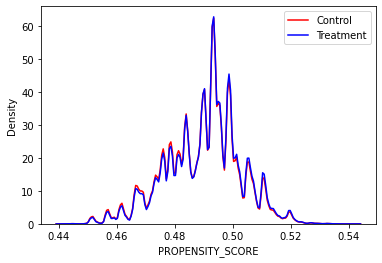

In [30]:
fig = sns.kdeplot(df_mod.query("ANO==0")["PROPENSITY_SCORE"],bw_adjust=.7, shade=False, color="r")
fig = sns.kdeplot(df_mod.query("ANO==1")["PROPENSITY_SCORE"],bw_adjust=.7, shade=False, color="b")
plt.legend(['Control','Treatment'])
plt.savefig('fig1a.png', format='png', dpi=300)
plt.show()

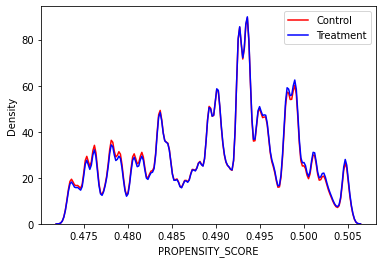

In [31]:
fig = sns.kdeplot(psw_base.query("ANO==0")["PROPENSITY_SCORE"],bw_adjust=0.7, shade=False, color="r")
fig = sns.kdeplot(psw_base.query("ANO==1")["PROPENSITY_SCORE"],bw_adjust=0.7, shade=False, color="b")
plt.legend(['Control','Treatment'])
plt.savefig('fig1b.png', format='png', dpi=300)
plt.show()

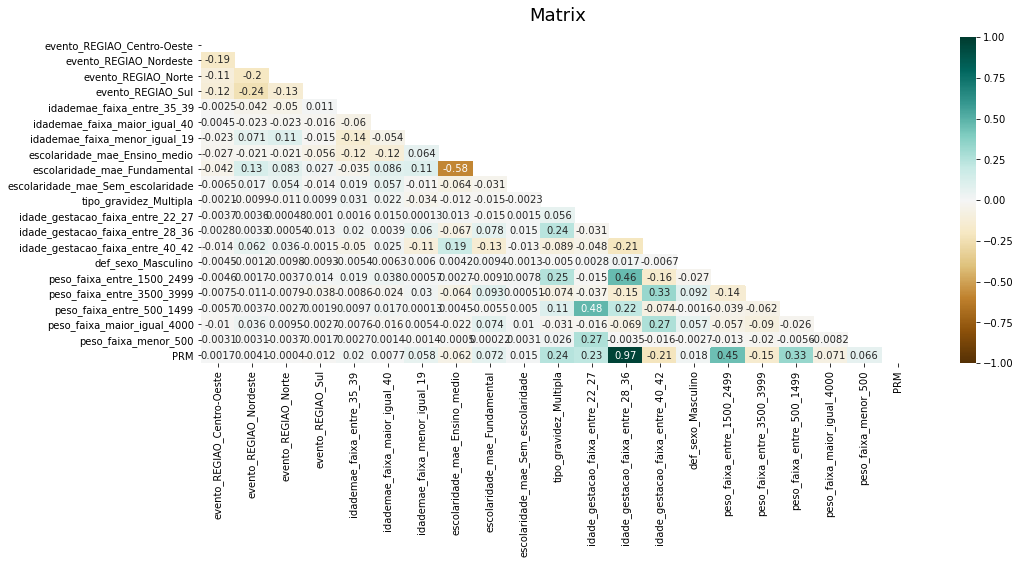

In [32]:
#spearm
var_corr=[ 'evento_REGIAO_Centro-Oeste'
    , 'evento_REGIAO_Nordeste'
    , 'evento_REGIAO_Norte'
    #, 'evento_REGIAO_Sudeste'
    , 'evento_REGIAO_Sul'
    #, 'idademae_faixa_entre_20_34'
    , 'idademae_faixa_entre_35_39'
    , 'idademae_faixa_maior_igual_40'
    , 'idademae_faixa_menor_igual_19'
    , 'escolaridade_mae_Ensino_medio'
    #, 'escolaridade_mae_Ensino_superior'
    , 'escolaridade_mae_Fundamental'
    , 'escolaridade_mae_Sem_escolaridade'
    , 'tipo_gravidez_Multipla'
    #, 'tipo_gravidez_Unica'
    , 'idade_gestacao_faixa_entre_22_27'
    , 'idade_gestacao_faixa_entre_28_36'
    #, 'idade_gestacao_faixa_entre_37_39'
    , 'idade_gestacao_faixa_entre_40_42'
    #, 'def_sexo_Feminino'
    , 'def_sexo_Masculino'
    , 'peso_faixa_entre_1500_2499'
    #, 'peso_faixa_entre_2500_3500'
    , 'peso_faixa_entre_3500_3999'
    , 'peso_faixa_entre_500_1499'
    , 'peso_faixa_maior_igual_4000'
    , 'peso_faixa_menor_500'
    ,'PRM'
         ]


plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True

mask = np.triu(np.ones_like(psw_base[var_corr].corr(method="spearman"), dtype=np.bool))
heatmap = sns.heatmap(psw_base[var_corr].corr(method='spearman'), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Matrix', fontdict={'fontsize':18}, pad=16);